In [1]:
%matplotlib inline

In [325]:
import nltk
import pandas as pd
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bs4 import BeautifulSoup

In [4]:
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.corpora import Dictionary

In [17]:
import logging
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.models.ldaseqmodel import LdaSeqModel
from gensim.models.phrases import Phraser, Phrases
import ast

In [150]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Scrape data from Senate website

In [178]:
max_page = [336, 452, 426, 404, 228]

In [181]:
def scrape_page(url):
    base = 'http://www.senate.gov.ph/lis/'
    url = requests.get(url)
    scrap = BeautifulSoup(url.content, 'lxml')
    bills = scrap.select('div.alight > p > a')
    dats = []
    for bill in bills: 
        name_of_bill = bill.select('span')[0].text
        url_of_bill = base + bill['href']
        req_bill = requests.get(url_of_bill)
        bill_bs = BeautifulSoup(req_bill.content, 'lxml')
        try:
            dat = bill_bs.select('td#content blockquote')
            description, scope, status = dat[0].text, dat[1].text, dat[2].text
            txt = bill_bs.select('td#content')[0].text
            filed = txt[txt.index('Filed'):txt.index('\r\n', txt.index('Filed'))]
            congress = txt[txt.index('Congress') - 5: txt.index(' Congress') - 2]
        except:
            description, scope, status, filed, congress = 0,0,0,0,0
        data_dict = {
            'name': name_of_bill,
            'description': description,
            'scope': scope,
            'status': status,
            'filed': filed,
            'congress': congress
        }
        dats.append(data_dict)
    return dats

In [182]:
data = []
for index, value in enumerate(range(13, 18)):
    for page in range(1, max_page[index] + 1):
        print("Doing {}th congress, page {}".format(value, page))
        congress_page_url = 'http://www.senate.gov.ph/lis/leg_sys.aspx?congress={}&type=bill&p={}'.format(value, page)
        data.extend(scrape_page(congress_page_url))
    pd.DataFrame(data).to_csv('congress_{}.csv'.format(value), index=False)

Doing 15th congress, page 1
Doing 15th congress, page 2
Doing 15th congress, page 3
Doing 15th congress, page 4
Doing 15th congress, page 5
Doing 15th congress, page 6
Doing 15th congress, page 7
Doing 15th congress, page 8
Doing 15th congress, page 9
Doing 15th congress, page 10
Doing 15th congress, page 11
Doing 15th congress, page 12
Doing 15th congress, page 13
Doing 15th congress, page 14
Doing 15th congress, page 15
Doing 15th congress, page 16
Doing 15th congress, page 17
Doing 15th congress, page 18
Doing 15th congress, page 19
Doing 15th congress, page 20
Doing 15th congress, page 21
Doing 15th congress, page 22
Doing 15th congress, page 23
Doing 15th congress, page 24
Doing 15th congress, page 25
Doing 15th congress, page 26
Doing 15th congress, page 27
Doing 15th congress, page 28
Doing 15th congress, page 29
Doing 15th congress, page 30
Doing 15th congress, page 31
Doing 15th congress, page 32
Doing 15th congress, page 33
Doing 15th congress, page 34
Doing 15th congress, pa

Doing 15th congress, page 278
Doing 15th congress, page 279
Doing 15th congress, page 280
Doing 15th congress, page 281
Doing 15th congress, page 282
Doing 15th congress, page 283
Doing 15th congress, page 284
Doing 15th congress, page 285
Doing 15th congress, page 286
Doing 15th congress, page 287
Doing 15th congress, page 288
Doing 15th congress, page 289
Doing 15th congress, page 290
Doing 15th congress, page 291
Doing 15th congress, page 292
Doing 15th congress, page 293
Doing 15th congress, page 294
Doing 15th congress, page 295
Doing 15th congress, page 296
Doing 15th congress, page 297
Doing 15th congress, page 298
Doing 15th congress, page 299
Doing 15th congress, page 300
Doing 15th congress, page 301
Doing 15th congress, page 302
Doing 15th congress, page 303
Doing 15th congress, page 304
Doing 15th congress, page 305
Doing 15th congress, page 306
Doing 15th congress, page 307
Doing 15th congress, page 308
Doing 15th congress, page 309
Doing 15th congress, page 310
Doing 15th

Doing 16th congress, page 129
Doing 16th congress, page 130
Doing 16th congress, page 131
Doing 16th congress, page 132
Doing 16th congress, page 133
Doing 16th congress, page 134
Doing 16th congress, page 135
Doing 16th congress, page 136
Doing 16th congress, page 137
Doing 16th congress, page 138
Doing 16th congress, page 139
Doing 16th congress, page 140
Doing 16th congress, page 141
Doing 16th congress, page 142
Doing 16th congress, page 143
Doing 16th congress, page 144
Doing 16th congress, page 145
Doing 16th congress, page 146
Doing 16th congress, page 147
Doing 16th congress, page 148
Doing 16th congress, page 149
Doing 16th congress, page 150
Doing 16th congress, page 151
Doing 16th congress, page 152
Doing 16th congress, page 153
Doing 16th congress, page 154
Doing 16th congress, page 155
Doing 16th congress, page 156
Doing 16th congress, page 157
Doing 16th congress, page 158
Doing 16th congress, page 159
Doing 16th congress, page 160
Doing 16th congress, page 161
Doing 16th

Doing 16th congress, page 403
Doing 16th congress, page 404
Doing 17th congress, page 1
Doing 17th congress, page 2
Doing 17th congress, page 3
Doing 17th congress, page 4
Doing 17th congress, page 5
Doing 17th congress, page 6
Doing 17th congress, page 7
Doing 17th congress, page 8
Doing 17th congress, page 9
Doing 17th congress, page 10
Doing 17th congress, page 11
Doing 17th congress, page 12
Doing 17th congress, page 13
Doing 17th congress, page 14
Doing 17th congress, page 15
Doing 17th congress, page 16
Doing 17th congress, page 17
Doing 17th congress, page 18
Doing 17th congress, page 19
Doing 17th congress, page 20
Doing 17th congress, page 21
Doing 17th congress, page 22
Doing 17th congress, page 23
Doing 17th congress, page 24
Doing 17th congress, page 25
Doing 17th congress, page 26
Doing 17th congress, page 27
Doing 17th congress, page 28
Doing 17th congress, page 29
Doing 17th congress, page 30
Doing 17th congress, page 31
Doing 17th congress, page 32
Doing 17th congress, 

# Consolidate and parse data from 13th to 17th Congress

In [92]:
for i in range(14, 18):
    ap = pd.read_csv('congress_{}.csv'.format(i))
    x  = pd.concat([x,ap], ignore_index=True)

In [103]:
x['name'] = x['name'].str.replace(r'SBN-[0-9:]+', '').str.lower()

In [105]:
x['description'] = x['description'].str.lower()

In [113]:
x['date_filed'] = pd.to_datetime(x['filed'].str.extract(r'Filed on ([JFMASOND][a-z]+ [0-9]{1,2}, 2[0-9]{3})'))

/Users/piocalderon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [231]:
authors = x['filed'].str.extractall(r'(?P<lastname>[A-Z][a-z]+( [A-Z][A-Za-z]+(\.)?)?), (?P<firstname>["A-Za-z]+)')

In [233]:
authors.drop(columns=[1, 2], inplace=True)

In [234]:
authors['name'] = authors['firstname'] + ' ' + authors['lastname'] 

In [235]:
authors.drop(columns = ['lastname', 'firstname'], inplace=True)

In [238]:
unstacked = authors.unstack(level = 1)

In [256]:
unstacked.columns = range(23)

In [279]:
def combine_to_list(x):
    return [s for s in x.values if s != None]

In [288]:
listed_authors = unstacked.apply(combine_to_list, axis=1)

In [291]:
listed_authors.name = 'listed_authors'

In [760]:
all_data = x.join(listed_authors)

In [96]:
all_data['name_description'] = all_data['name'] + ' ' + all_data['description']

In [762]:
all_data = all_data[['congress', 'name', 'description', 'name_description', 'date_filed', 'listed_authors']]

In [763]:
all_data = all_data.sort_values('date_filed')

In [768]:
all_data = all_data.reset_index().drop(columns='index')

In [97]:
# remove punct
all_data['name_description'] = all_data['name_description'].str.replace(r'[^a-z0-9\- ]', '')

In [770]:
all_data.to_csv('all_data.csv', index=False)

remove act from name description

# Text preprocessing

In [98]:
all_data['name_description'] = all_data['name_description'].map(word_tokenize)

In [99]:
all_data['name_description'] = all_data['name_description'].map(pos_tag)

In [121]:
all_data['name_description'] = all_data['name_description'].map(lambda words: [word for word in words if (word[1].startswith('N') or word[1].startswith('J'))])

In [122]:
sw = stopwords.words('english')
wn = WordNetLemmatizer()

In [123]:
def getwordnet_pos(x):
    if x.startswith('J'):
        return wordnet.ADJ
    if x.startswith('V'):
        return wordnet.VERB
    if x.startswith('N'):
        return wordnet.NOUN
    if x.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def lemmatize_text(pos):
    lemmatizer = wn.lemmatize
    lemm_wkrds = [lemmatizer(pos[0], getwordnet_pos(pos[1]))]
    return lemm_wkrds[0]

In [124]:
all_data['name_description'] = all_data['name_description'].map(lambda x: [lemmatize_text(word) for word in x])

In [125]:
all_data['name_description'] = all_data['name_description'].map(lambda x: [word for word in x if word not in sw])

In [167]:
all_data.to_csv('all_data.csv', index=False)

In [206]:
all_data = pd.read_csv('all_data.csv')

In [207]:
all_data['name_description'] = all_data['name_description'].map(ast.literal_eval)

In [208]:
sentences = all_data['name_description'].values

In [221]:
dictionary = Dictionary(sentences)

In [222]:
words = [x[1] for x in list(dictionary.items())]

In [223]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [224]:
with_numbers = [x for x in words if hasNumbers(x)]

In [225]:
dictionary.filter_tokens(bad_ids=[dictionary.token2id[x] for x in ['act', 'presidential', 'ii', 'eo', 'code', 'government', 'provide', 'purpose', 'therefor', 'penal', 'thereof', 'revised', 'article', 'provision', 'amended', 'therefore', 'ng', 'ra', 'b', 'san', 'sa', 'del', 'pd', 'decree', 'rano', 'fund', 'program', 'national', 'law', 'republic', 'philippine', 'otherwise', 'section'] + with_numbers])

In [226]:
corpus = [dictionary.doc2bow(sentence) for sentence in sentences]

# LDA Model

In [232]:
model = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=5, random_state=1)

In [233]:
pyLDAvis.display(pyLDAvis.gensim.prepare(model, corpus, dictionary))

/Users/piocalderon/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


# Check dynamics of topics

In [417]:
container = pd.DataFrame()
for congress in range(13,18):
    counter = np.zeros(15)
    for i in all_data[all_data['congress'] == congress].index:
        dist = model.get_document_topics(corpus[i])
        for top in dist:
            if top[1] >= 0.4:
                if top[0] == 10:
                    print(all_data.iloc[i, 1])
                counter[top[0]] += 1
    counter = pd.Series(counter, name=congress)
    container = pd.concat([container, counter], axis=1)

 magna carta of government accountants
 magna carta of social workers
 national security act of 2004
 philippine overseas workers bank
 magna carta of social workers of 2004
 migrant workers higher standard of protection
 migrant workers hospital act of 2004
 free medical and dental assistance to indigent children
 free dental services in rural areas
 national employment assistance center of the philippines
 commission on missing persons
 book publishing industry development act (amendments)
 free medical and dental assistance to indigent children
 disabled persons privileges and incentives
 media protection for the disabled act
 overseas filipino workers' day
 philippine overseas workers bank
 migrant workers deregulation plan
 overseas filipinos investment act
 overseas filipino workers medical center
 biodiversity protection and bioresource development act
 environment friendly act
 broadcast media closed-caption
 gradual phase-out of poea regulatory functions
 owwa migrant workers 

 river systems and waterways ecological zones act of 2007
 magna carta for disabled persons
 trading and exporting of flora and fauna (prohibition)
 national ecotourism policy act of 2007
 education and heritage program for overseas filipino act of 2007
 abolishing owwa and transferring its functions to poea
 magna carta for day care workers
 magna carta of students
 national employment assistance center of the philippines act of 2007
 national security act
 emergency rice reserves act of 2007
 philippine overseas workers bank
 indigent children free medical and dental service act
 prohibiting presentation of suspects in press conference
 medical and dental assistance to indigent children
 migrant workers hospital act of 2007
 commission on missing persons
 revised  public land act of the philippines
 magna carta of patient's rights and obligations
 strategic food security rice reserve act of 2007
 magna carta for agricultural development workers
 strategic food security rice reserve a

 athletes with disability or differently-abled athletes
 disposition of smuggled sugar act of 2010
 filipino professional athletes retirement incentive and health care benefits act of 2010
 philippine book publishing industry development center
 anti-sugar smuggling act of 2010
 family welfare act
 sloping agricultural land technology (salt) act of 2010
 magna carta for day care workers
 magna carta of public health workers
 philippine overseas workers bank
 national employment assistance center of the philippines act of 2010
 philippine midwifery act of 2010
 patients' grievance machinery act of 2010
 strategic food security rice reserve act of 2010
 national land use act of the philippines
 national ecotourism policy act of 2010
 private hospital assistance act of 2010
 magna carta of workers in the informal sector (r. a. no. 7160 and r.a. 8282)
 book publishing industry development act
 magna carta of agricultural development workers
 free medical and dental assistance to indigent c

 magna carta of workers in the informal economy
 magna carta for youth
 pagasa modernization of 2013
 filipino volunteerism in nation-building (vnb) or bayanihan sa bagumbayan (bsb) act
 sugar cane industry development act of 2013
 barangay integrated development approach for nutrition improvement (bidani) act of 2013
 owwa act of 2013
 pilipinong marino act of 2013
 magna carta for small enterprises
 silica regulatory act
 overseas workers credit assistance act of 2013
 presentation of suspects to the media
 cancer assistance fund
 isocyanates regulatory act
 sugar regulatory administration (sra)
 plastic bag regulation act of 2013
 overseas filipino workers credit assistance act of 2013
 magna carta of public health workers
 filipino professional athletes retirement incentive and health care benefits act of 2013
 book publishing industry development act
 national ecotourism policy act of 2013
 loom weaving industry act
 real property tax (trees and other improvements on lands)
 slopi

 magna carta of patient's rights and obligations act of 2017
 department of overseas filipino workers (ofw) act of 2017
 department of foreign employment act of 2017
 department of overseas filipino workers act
 the filipino sign language act
 agri-food terminal and trading centers act of 2017
 mandating the requisite proportion of filipino laborers to foreign workers (p.d. 442 )
 national land use act of 2017
 amending r.a. no. 6977, as amended (magna carta for small enterprises)
 transnational higher education act
 right to adequate food act
 government internship program (gip) act
 magna carta of the out-of-school youth
 prohibiting government officials/employees in recruiting migrant workers (poea, dole, owwa, dfa)
 free medical and dental assistance to indigent children
 allowing access to pwds with guide animals
 land transportation stations to provide free internet and free access to sanitary facilities
 right to adequate food framework act
 amending sec. 40 of r. a. no. 9710 (t

In [333]:
totals = all_data['congress'].value_counts()

In [381]:
normalized = container.divide(totals)

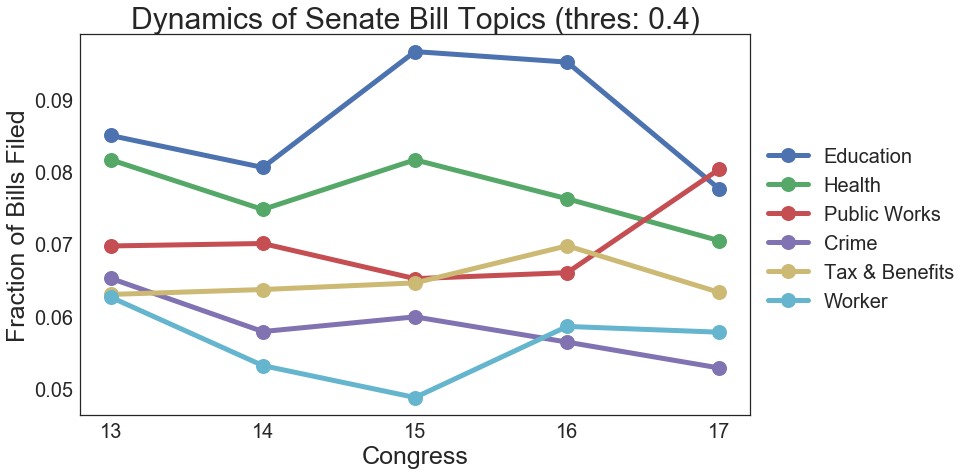

In [416]:
sns.set_style("white")
plt.figure(figsize=(12,7))
plt.plot([13,14,15,16,17], normalized.values[5,:], 'o-', lw=5, ms=15, label = 'Education')
plt.plot([13,14,15,16,17], normalized.values[12,:], 'o-', lw=5, ms=15, label = 'Health')
plt.plot([13,14,15,16,17], normalized.values[9,:], 'o-', lw=5, ms=15, label = 'Public Works')
plt.plot([13,14,15,16,17], normalized.values[4,:], 'o-', lw=5, ms=15, label = 'Crime')
plt.plot([13,14,15,16,17], normalized.values[6,:], 'o-', lw=5, ms=15, label = 'Tax & Benefits')
plt.plot([13,14,15,16,17], normalized.values[10,:], 'o-', lw=5, ms=15, label = 'Worker')
plt.legend(bbox_to_anchor=(1.0, 0.75), fontsize=20);
plt.xticks([13,14,15,16,17], size=20);
plt.yticks(size=20);
plt.xlabel('Congress', size=25)
plt.ylabel('Fraction of Bills Filed', size=25)
plt.title('Dynamics of Senate Bill Topics (thres: 0.4)', size=30)
plt.savefig('td.png', bbox_inches='tight')